### Plotting percfil 0 --> 0.3 by 0.05 increments

In [2]:
import sys, numpy as np
sys.path.append('/Users/mikewu/Desktop/Research/persist-homology/')
import sub_parse
reload(sub_parse)
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [3]:
name = '/Users/mikewu/Desktop/Research/persist-homology/saved_states/large_sub_set_test/results-'
norm = 'False'
base = '0.1'
paths = [name+str(i)+'-'+base+'baseNorm'+norm+'.txt' for i in range(1, 101)]

In [4]:
singles = ['all-silh', 'euler', 'all-euler', 'silh-euler']
doubles = ['indiv_silh', 'indiv-euler', 'contour']

In [5]:
resArr = np.array([sub_parse.parse(f) for f in paths])

In [6]:
bighash = {}
for characteristic in singles:
    bighash[characteristic] = sub_parse.prepare1d(resArr, characteristic)
    
for characteristic in doubles:
    for dim in [0,1,2]:
        bighash[characteristic+'-dim-'+str(dim)] = sub_parse.prepare2d(resArr, characteristic, dim)

In [7]:
def safelog10(B, noise=1e-5):
    B[B == 0] += noise
    return np.log10(B)

import rpy2.robjects as robjects
from rpy2.robjects.numpy2ri import numpy2ri
import numpy as np

def rds_to_np(Rfile):
    ''' Convert .RData to be able to load 
        the array into Python.

        Rfile := (str) location of file to 
        translate to Python.
    ''' 
    raw = robjects.r['readRDS'](Rfile)
    return raw

#### Euler based-Tests Log10 P-values

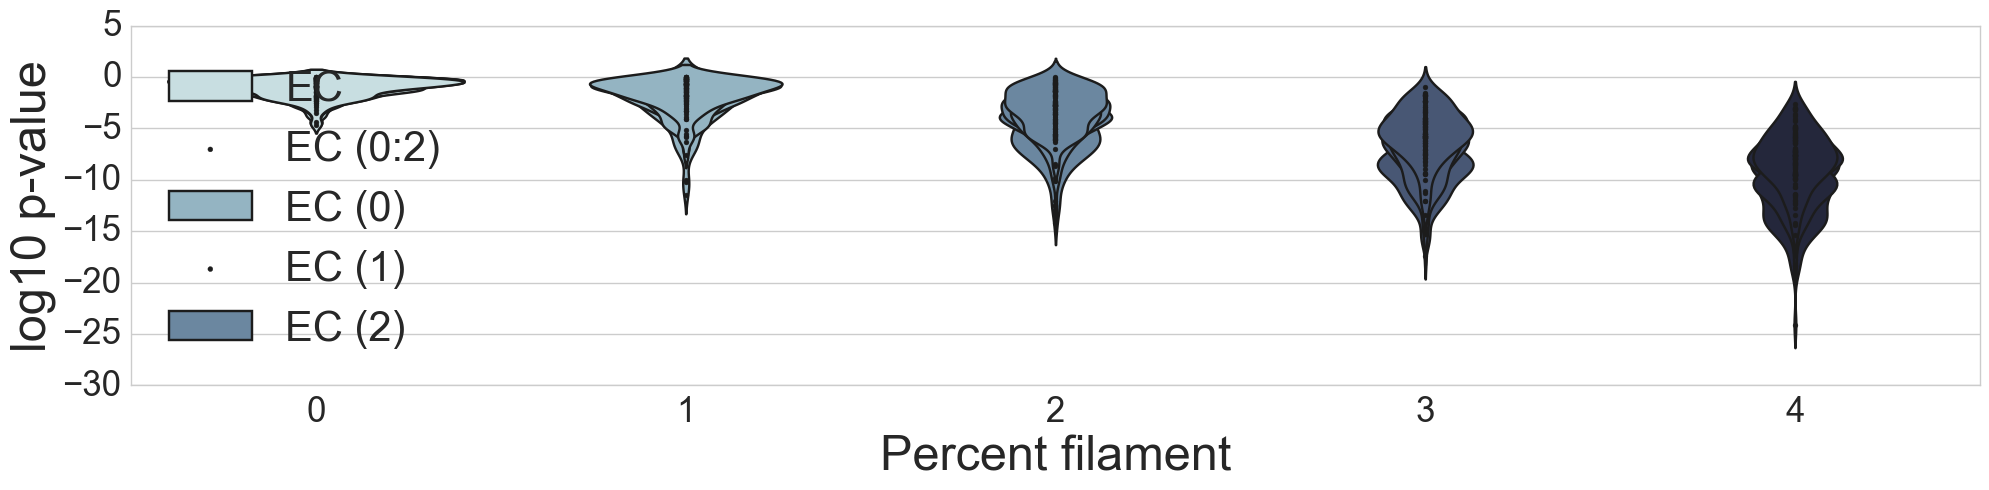

In [28]:
xvalues = np.arange(0.1, 0.35, 0.05)
matplotlib.rc('xtick', labelsize=27) 
matplotlib.rc('ytick', labelsize=27) 
plt.figure(figsize=(20,5))
plt.ylabel('log10 p-value', fontsize=35)
plt.xlabel('Percent filament', fontsize=35)

allkeys = ['euler', 'all-euler', 'indiv-euler-dim-0', 'indiv-euler-dim-1', 'indiv-euler-dim-2']
allticks = ['EC', 'EC (0:2)', 'EC (0)', 'EC (1)', 'EC (2)']
allcolors = ['#44B3C2', '#F1A94E', '#E45641', '#5D4C46', '#7B8D8E']
allshapes = ['o', 'o', 'o', 'o', 'o']
allgraphs = []

for k, c, s, t in zip(allkeys, allcolors, allshapes, allticks):
    graph, = plt.plot(xvalues, 
                      [np.percentile(np.log10(np.exp(i)), 50) for i in bighash[k]], 
                      s, 
                      color=c, 
                      markersize=25, 
                      label=t)
    allgraphs.append(graph)
plt.legend(allticks, fontsize=30, loc='lower left')

for k, c, s, t in zip(allkeys, allcolors, allshapes, allticks):
    plt.plot(xvalues, 
             [np.percentile(np.log10(np.exp(i)), 100) for i in bighash[k]], 
             's', 
             color=c, 
             markersize=15,
             alpha=0.5)
    plt.plot(xvalues, 
             [np.percentile(np.log10(np.exp(i)), 0) for i in bighash[k]], 
             's', 
             color=c, 
             markersize=15,
             alpha=0.5)

for k, c, s in zip(allkeys, allcolors, allshapes):
    _, plt.plot(xvalues, 
                [np.percentile(np.log10(np.exp(i)), 50) for i in bighash[k]], 
                color=c, 
                markersize=0, 
                alpha=1, 
                linewidth=6.0)

plt.tick_params(axis='both', which='major', labelsize=25)
plt.tight_layout()
plt.show()

#### Silhouette based-tests Log10 P-values

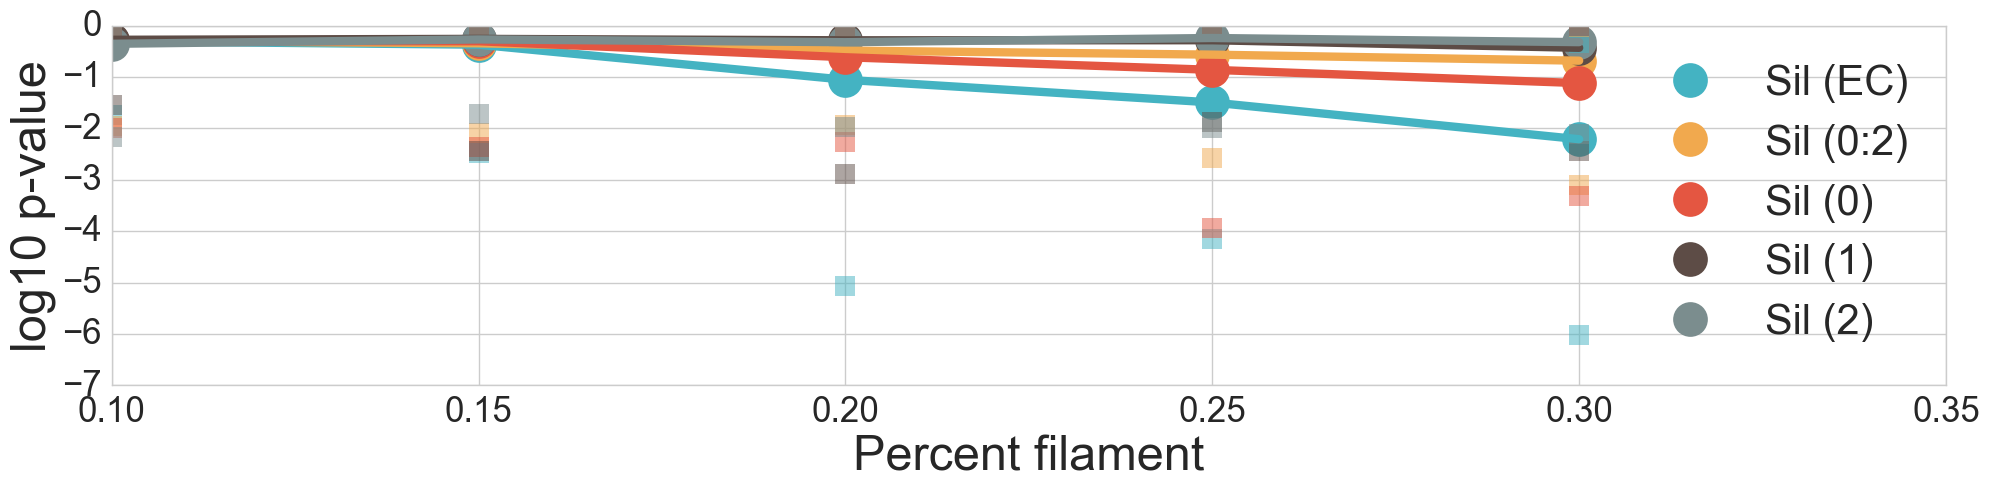

In [85]:
xvalues = np.arange(0.1, 0.35, 0.05)
matplotlib.rc('xtick', labelsize=27) 
matplotlib.rc('ytick', labelsize=27) 
plt.figure(figsize=(20,5))
plt.ylabel('log10 p-value', fontsize=35)
plt.xlabel('Percent filament', fontsize=35)

allkeys = ['silh-euler', 'all-silh', 'indiv_silh-dim-0', 'indiv_silh-dim-1', 'indiv_silh-dim-2']
allticks = ['Sil (EC)', 'Sil (0:2)', 'Sil (0)', 'Sil (1)', 'Sil (2)']
allcolors = ['#44B3C2', '#F1A94E', '#E45641', '#5D4C46', '#7B8D8E']
allshapes = ['o', 'o', 'o', 'o', 'o']
allgraphs = []

for k, c, s, t in zip(allkeys, allcolors, allshapes, allticks):
    graph, = plt.plot(xvalues, 
                      [np.percentile(np.log10(np.exp(i)), 50) for i in bighash[k]], 
                      s, 
                      color=c, 
                      markersize=25, 
                      label=t)
    allgraphs.append(graph)
plt.legend(allticks, fontsize=30, loc='best')

for k, c, s, t in zip(allkeys, allcolors, allshapes, allticks):
    plt.plot(xvalues, 
             [np.percentile(np.log10(np.exp(i)), 100) for i in bighash[k]], 
             's', 
             color=c, 
             markersize=15,
             alpha=0.5)
    plt.plot(xvalues, 
             [np.percentile(np.log10(np.exp(i)), 0) for i in bighash[k]], 
             's', 
             color=c, 
             markersize=15,
             alpha=0.5)

for k, c, s in zip(allkeys, allcolors, allshapes):
    _, plt.plot(xvalues, 
                [np.percentile(np.log10(np.exp(i)), 50) for i in bighash[k]], 
                color=c, 
                markersize=30, 
                alpha=1, 
                linewidth=6.0)

plt.tick_params(axis='both', which='major', labelsize=25)    
plt.tight_layout()
plt.show()

#### Contour based-tests Log10 P-values

/Users/mikewu/miniconda2/envs/astro/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: divide by zero encountered in log10
/Users/mikewu/miniconda2/envs/astro/lib/python2.7/site-packages/ipykernel/__main__.py:25: RuntimeWarning: divide by zero encountered in log10
/Users/mikewu/miniconda2/envs/astro/lib/python2.7/site-packages/ipykernel/__main__.py:31: RuntimeWarning: divide by zero encountered in log10
/Users/mikewu/miniconda2/envs/astro/lib/python2.7/site-packages/ipykernel/__main__.py:37: RuntimeWarning: divide by zero encountered in log10


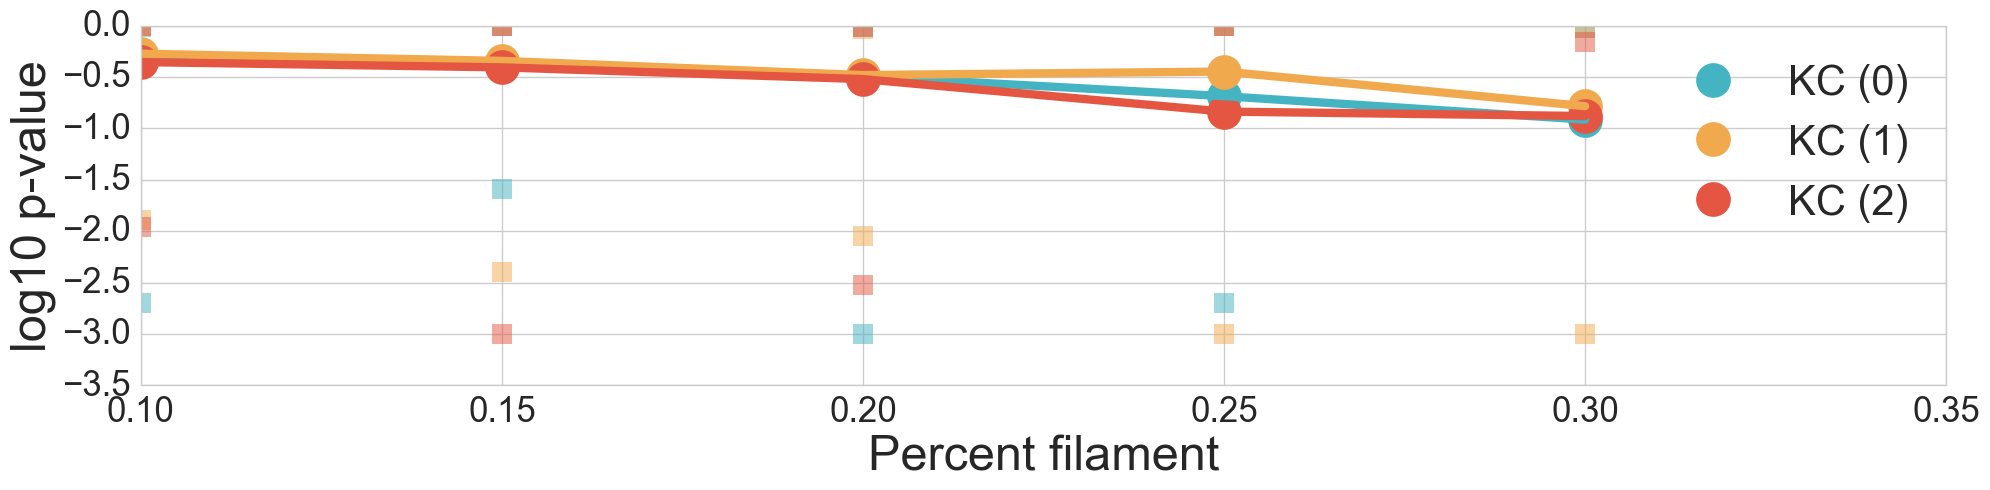

In [84]:
xvalues = np.arange(0.1, 0.35, 0.05)
matplotlib.rc('xtick', labelsize=27) 
matplotlib.rc('ytick', labelsize=27) 
plt.figure(figsize=(20,5))
plt.ylabel('log10 p-value', fontsize=35)
plt.xlabel('Percent filament', fontsize=35)

allkeys = ['contour-dim-0', 'contour-dim-1', 'contour-dim-2']
allticks = ['KC (0)', 'KC (1)', 'KC (2)']
allcolors = ['#44B3C2', '#F1A94E', '#E45641', '#5D4C46', '#7B8D8E']
allshapes = ['o', 'o', 'o', 'o', 'o']
allgraphs = []

for k, c, s, t in zip(allkeys, allcolors, allshapes, allticks):
    graph, = plt.plot(xvalues,
                      [np.percentile(np.log10(np.exp(i)), 50) for i in bighash[k]], 
                      s, 
                      color=c, 
                      markersize=25, 
                      label=t)
plt.legend(allticks, fontsize=30, loc='best')

for k, c, s, t in zip(allkeys, allcolors, allshapes, allticks):
    plt.plot(xvalues, 
             [np.percentile(np.log10(np.exp(i)), 100) for i in bighash[k]], 
             's', 
             color=c, 
             markersize=15,
             alpha=0.5)
    plt.plot(xvalues, 
             [np.percentile(np.log10(np.exp(i)), 0) for i in bighash[k]], 
             's', 
             color=c, 
             markersize=15,
             alpha=0.5)
for k, c, s in zip(allkeys, allcolors, allshapes):
    tmp = [np.percentile(np.log10(np.exp(i)), 50) for i in bighash[k]]
    _, plt.plot(xvalues, 
                tmp, 
                color=c, 
                markersize=30, 
                alpha=1, 
                linewidth=6.0)

plt.tick_params(axis='both', which='major', labelsize=25)    
plt.tight_layout()
plt.show()

#### Correlation based-tests Log10 P-values

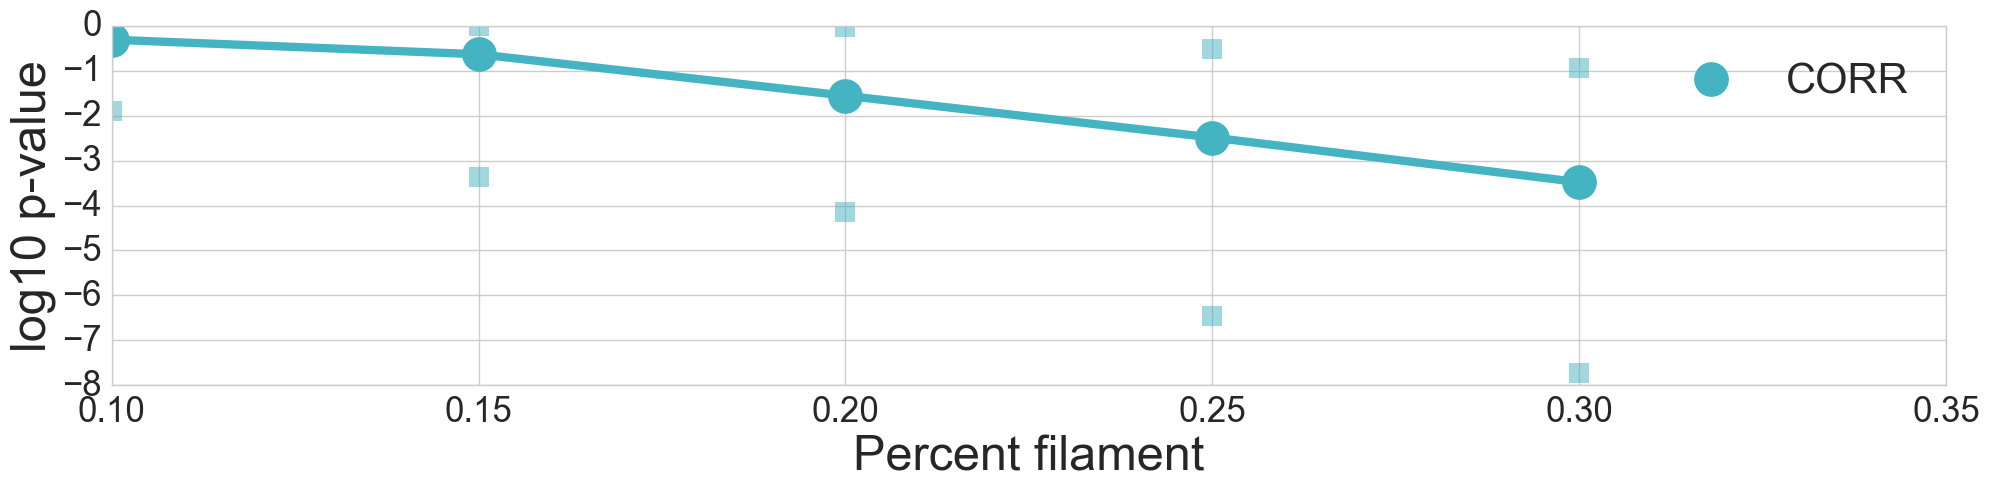

In [83]:
xvalues = np.arange(0.1, 0.35, 0.05)
matplotlib.rc('xtick', labelsize=27) 
matplotlib.rc('ytick', labelsize=27) 
plt.figure(figsize=(20,5))
plt.ylabel('log10 p-value', fontsize=35)
plt.xlabel('Percent filament', fontsize=35)

allticks = ['CORR']
allcolors = ['#44B3C2']
allshapes = ['o']
allgraphs = []

if norm == 'False':
    data = np.array(rds_to_np('/Users/mikewu/Desktop/Research/persist-homology/correlation/sub_output/voronoi_proba_norm(0).rds'))
else:
    data = np.array(rds_to_np('/Users/mikewu/Desktop/Research/persist-homology/correlation/sub_output/voronoi_proba_norm(1).rds'))

data = np.log10(np.exp(data))
fun = lambda x : np.percentile(x, 50, axis=0)
bighash2 = [fun(data)]

for k, (c, s, t) in enumerate(zip(allcolors, allshapes, allticks)):
    graph, = plt.plot(xvalues,
                      bighash2[k], 
                      s, 
                      color=c, 
                      markersize=25, 
                      label=t)
    allgraphs.append(graph)
plt.legend(allticks, fontsize=30, loc='best')

for k, (c, s, t) in enumerate(zip(allcolors, allshapes, allticks)):
    plt.plot(xvalues, 
             [np.percentile(data, 100, axis=0)][k], 
             's', 
             color=c, 
             markersize=15,
             alpha=0.5)
    plt.plot(xvalues, 
             [np.percentile(data, 0, axis=0)][k], 
             's', 
             color=c, 
             markersize=15,
             alpha=0.5)

for k, (c, s) in enumerate(zip(allcolors, allshapes)):
    _, plt.plot(xvalues, 
                bighash2[k], 
                color=c, 
                markersize=30, 
                alpha=1, 
                linewidth=6.0)

plt.tick_params(axis='both', which='major', labelsize=25)
plt.tight_layout()
plt.show()

#### Weighted Contour based-tests Log10 P-values

In [43]:
pi_data = np.load('/Users/mikewu/Desktop/Research/persist-homology/intensity/output/sub_proba/nonorm/ans-voronoi-nodim.npy')
wkc_data = np.load('/Users/mikewu/Desktop/Research/persist-homology/intensity/output/sub_proba/nonorm/ans-voronoi-bydim.npy')

In [44]:
wkc_data.shape, pi_data.shape
wkc_0 = wkc_data[:, 0, :]
wkc_1 = wkc_data[:, 1, :]
wkc_2 = wkc_data[:, 2, :]
pi_all = pi_data

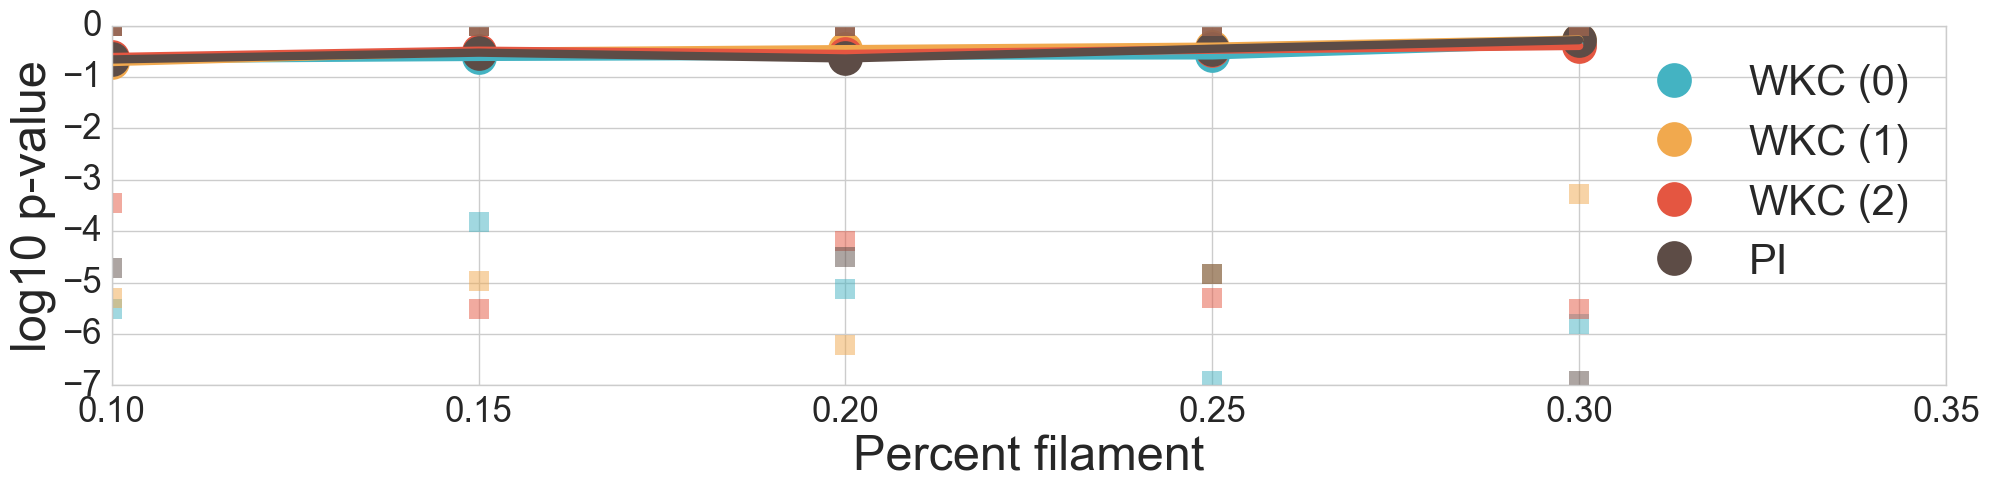

In [82]:
xvalues = np.arange(0.1, 0.35, 0.05)
matplotlib.rc('xtick', labelsize=27) 
matplotlib.rc('ytick', labelsize=27) 
plt.figure(figsize=(20,5))
plt.ylabel('log10 p-value', fontsize=35)
plt.xlabel('Percent filament', fontsize=35)

alldata   = [wkc_0, wkc_1, wkc_2, pi_all]
allticks  = ['WKC (0)', 'WKC (1)', 'WKC (2)', 'PI']
allcolors = ['#44B3C2', '#F1A94E', '#E45641', '#5D4C46']
allshapes = ['o', 'o', 'o', 'o']
allgraphs = []

for d, c, s, t in zip(alldata, allcolors, allshapes, allticks):
    graph, = plt.plot(xvalues, 
                      np.percentile(d, 50, axis=0), 
                      s, 
                      color=c, 
                      markersize=25, 
                      label=t)
plt.legend(allticks, fontsize=30, loc='best')

for d, c, s, t in zip(alldata, allcolors, allshapes, allticks):
    plt.plot(xvalues, 
             np.percentile(d, 100, axis=0), 
             's', 
             color=c, 
             markersize=15,
             alpha=0.5)
    plt.plot(xvalues, 
             np.percentile(d, 0, axis=0), 
             's', 
             color=c, 
             markersize=15,
             alpha=0.5)    

for d, c, s in zip(alldata, allcolors, allshapes):
    _, plt.plot(xvalues, 
                np.percentile(d, 50, axis=0), 
                color=c, 
                markersize=30, 
                alpha=1, 
                linewidth=6.0)
    
plt.tick_params(axis='both', which='major', labelsize=25)    
plt.tight_layout()
plt.show()

----